# Prediction of Diabetes Mellitus - A Machine Learning Approach

---
##  Executive Summary 
---

## Objective
The aim of this project is to find the best combination of feature selection and classification algorithms for improved diabetes prediction. To achieve this aim, we use an experimental technique in which we perform extensive experiments on real datasets from the Behavioral Risk Factor Surveillance System utilising two feature selection and classification methods (BRFSS).

##  Main results 
Our results show that the Logistic Regression provides the best performance across the two feature
sets generated from each feature selection method, with an accuracy of 74%, precision of 77% and
recall of 74%. The most accurate model we found achieved an accuracy of 75%, precision of 77% and
a recall of 75% when using the original full feature dataset with the Logistic Regression algorithm
again.

Clinicians and healthcare professionals can utilise the models developed in this project to detect
diabetes in new patients, provided patient data for the features used is accessible.

---
## <span style='color:blue' > Introduction </span>
---

## Problem Context and Motivation

Diabetes is one of the deadliest and chronic disorders, causing a surge in blood sugar and a slew of issues if left untreated and undiagnosed [Sisodia and Sisodia 2018]. Although several traditional methods based on physical and chemical testing are available for diagnosis, clinicians have difficulties in identifying and predicting diabetes due to the intricate interdependence of multiple organs such as the kidneys.

Improving the identification of high-risk indicators may help to reduce problems. We provide a method for automatically detecting diabetes using Feature Selection and Machine Learning algorithms in this project.
The aim of this project is to investigate which model predicts type 2 diabetes best and which factors are most important in diabetes prediction.

## Project Questions

The project will be guided by the following questions:
 -   What are the most influential features for the prediction of type 2 diabetes?
 - Which features are consistently ranked highly by all the feature selection algorithms?
 - Are there features that have a high rank with some feature selection algorithm and a low rank with another?
 - Which combinations of feature selection and classification algorithms give the best performance in type 2 diabetes prediction?

## Methodology

In our suggested approach, the original dataset with its original set of characteristics is initially fed into the system. Following that, the Chi-squared and Pearson Correlation feature selection procedures, which will be detailed further below, are applied to the training dataset, yielding a feature set. This feature collection, as well as the original dataset with all of its features, is fed into two distinct classification methods. The two classification methods employed are also explained in length in the next section. Once the classifiers have generated the models, they are evaluated using various assessment metrics utilising a cross validation schema to determine their accuracy in predicting diabetes.

---
## <span style='color:blue' > Data Description </span>
---

## Origin

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey conducted by the Centers for Disease Control and Prevention (CDC). Every year, the survey collects responses from over tens of thousands of Americans on health-related risk behaviours, chronic health issues, and usage of preventive treatments. BRFSS conducts over 400,000 adult interviews each year, making it the world's biggest continually performed health survey system [Brown *et al.* 2004].

The collected data we are using is a reduced version
of the BRFSS, which consisted of a total of 253,680 records
reflecting the actual responses to the survey conducted by
the CDC’s BRFSS2015. However our particular dataset comprises a total of 22
features (columns) with atleast 70 000 survey responders (rows), including the class feature. The class variable
(Diabetes_binary) is a binary variable indicating whether the
patient has diabetes.

## About our dataset

All BRFSS data are self-reported responses to mostly forced-choice questions [Ford and Newman 1991],[Chandler 2018] and the description of the features are detailed below.

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI) 

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

### Target variable

**Diabetes_binary** : you have diabetes (0,1)

---
## <span style='color:blue' > Data Wrangling & Exploratory Analysis </span>
---

Preprocessing the data to make it acceptable for analysis is equally as crucial as the analysis itself in many data analysis challenges. Preprocessing activities include imputation for missing data, converting categorical (nominal) and ordinal variable values to those acceptable for calculation, and variable normalisation.

---
### Read in the dataset
---

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets, preprocessing
import random
random.seed(1)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import scipy

In [2]:
#read in the dataset 
data_2015 = pd.read_csv('BRFSS2015.csv')
data_2015.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


##### **Sanity check**
---

In [3]:
#check number of rows and columns
data_2015.shape

(253680, 22)

In [4]:
#check number of rows and columns
data_2015.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<AxesSubplot:title={'center':'Check for missing values'}>

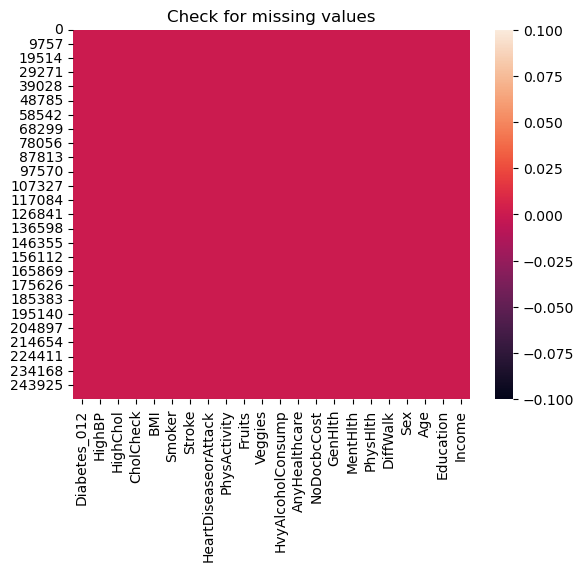

In [5]:
#check null values and plot
plt.title('Check for missing values')
sns.heatmap(data_2015.isnull())

We've demonstrated that there are no missing values in our dataset. Because the Chi-squared test only works with nominal and binary features, all numerical characteristics must be discretized [Spencer *et al.* 2020]. However, because all of the values in our dataset were numerical or nominal, we did not need to do this.

---
### Handling class imbalance with random undersampling
---

One of the most difficult phases in developing prediction models, particularly in healthcare decision support systems, is preparing the data in a way that allows for trustworthy outcomes. The raw data gathered from real-world settings is frequently incomplete, unbalanced, and unclean. As a result, before training the model using real-world data, numerous preprocessing processes must be done to improve the data quality. Several procedures were taken in this work to deal with discrepancies in the dataset [Ullah et al. 2022]. Despite the fact that there were no missing values, the dataset was severely skewed, as illustrated in the plot below.

In [6]:
#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so that we have 0 meaning non-diabetic  and 1 meaning diabetic.
data_2015['Diabetes_012'] = data_2015['Diabetes_012'].replace({1:0})
data_2015['Diabetes_012'] = data_2015['Diabetes_012'].replace({2:1})

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Diabetes_012
0.0    218334
1.0     35346
dtype: int64

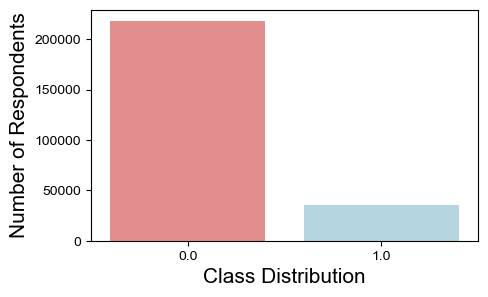

In [7]:
#show class sizes
plt.figure(figsize=(5,3))
sns.axes_style("darkgrid")
colors=["lightcoral","lightblue"]
sns.countplot('Diabetes_012', data=data_2015, palette=colors,)
sns.set(style='dark')
plt.xlabel("Class Distribution", fontsize=15)
plt.ylabel('Number of Respondents',fontsize= 15)
data_2015.groupby(['Diabetes_012']).size()

The distribution of the sample in our dataset is:
* Non-diabetic: 218334 (86.07%)
* Diabetic: 35346 (13.93%)

In an unbalanced data scenario, one form of data outnumbers the other types of data in a dataset. As we can see above, our dataset is severely skewed. The class labelled "0.0," which means non-diabetic, accounts for 86.07% of the data, whereas the class labelled "1," which means diabetes, accounts for just 13.93%.

Random Undersampling was used to solve the unbalanced dataset problem in this project. Random undersampling entails picking cases from the majority class at random and removing them from the training dataset [Ullah et al. 2022]. This strategy may be more appropriate for datasets with a class imbalance, albeit with a sufficient number of cases in the minority class, such a helpful model can be fit, as in our case.The under-sampling techniques on the other hand down sized the major class randomly however they have risk of eliminating the important datasets [Qazi and Raza 2012] . 

In [8]:
# Random undersampling
#Divide the classes
diabetic = data_2015[data_2015['Diabetes_012'] == 1]
non_diabetic = data_2015[data_2015['Diabetes_012'] == 0]
#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35346 cases from the diabetes risk group
data_2015_class_0_under = non_diabetic.sample(35346)
data_2015_balanced = pd.concat([data_2015_class_0_under, diabetic], axis=0)

In [9]:
#Start here

In [10]:
#Change the column name to Diabetes_Outcome
data_2015_balanced = data_2015_balanced.rename(columns = {'Diabetes_012': 'Diabetes_Outcome'})

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Respondents')

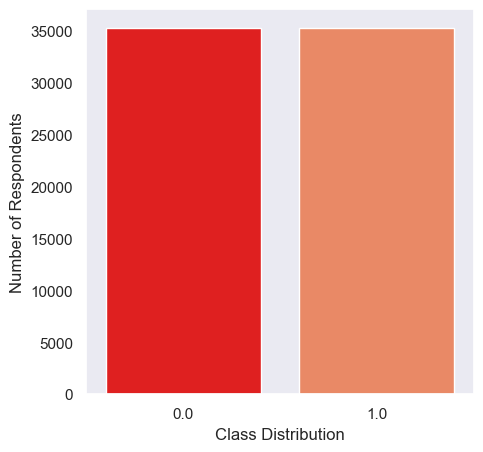

In [11]:
#show class sizes

colors=["red","coral"]
plt.figure(figsize=(5,5))
sns.countplot('Diabetes_Outcome', data=data_2015_balanced, palette=colors,)
sns.set(style='dark')
plt.xlabel("Class Distribution")
plt.ylabel('Number of Respondents')

As we can see our dataset is now blanced with a 50-50 split distribution of 35,346 diabetic individuals to 35,346 randomly selected non-diabetics.

---
### Exploratory Data Analysis
---

We now explore and analyse the influence of lifestyle factors, gender and chronic diseases on a person's diabetes status.
<br>Please note our target variable (Diabetes_Outcome) values are defined as: 
- $0$ = Non-diabetic
- $1$ = Diabetic

##### **Sex**
---

We first want to find out if there is a sex-based difference in diabetes prevalence. Is diabetes more common in males than females
or vice-versa, or not at all ?. (Female is denoted by 0 and Male by 1 in the plot below)

Text(0.5, 0, 'Non-diabetiec vs diabetic')

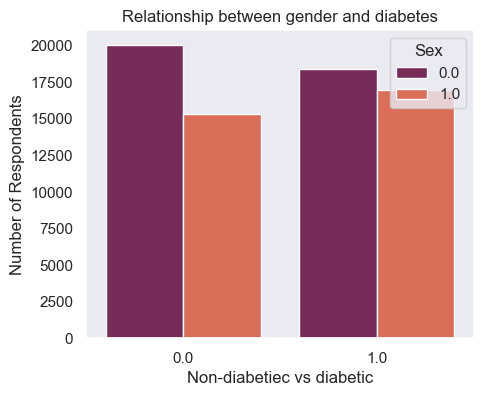

In [12]:
#plot relationship between Sex and diabetes
plt.figure(figsize=(5,4))
sns.countplot(x='Diabetes_Outcome',data=data_2015_balanced,hue='Sex', palette="rocket")
sns.set(style='dark')
plt.title("Relationship between gender and diabetes")
plt.ylabel('Number of Respondents')
plt.xlabel('Non-diabetiec vs diabetic')

We may deduce from the above plot that there are more diabetic males than females, and certainly there are more non-diabetic females than diabetic males, implying that diabetes is more frequent in men than women. Men accumulate more fat in their tummies, which is a known risk factor [Nordström et al. 2016].

##### **Age**
---

Age is comprised of one categorical item listed in the computed respondent age section of
the BRFSS, listed categorically in 14 items. Each item in the Fourteen-Level Age Category was
grouped six years at a time (i.e., 1 = Age 18 to 24, 2= Age 25 to 29…etc.)

Text(-8.805555555555555, 0.5, 'Number of Respondents')

<Figure size 400x300 with 0 Axes>

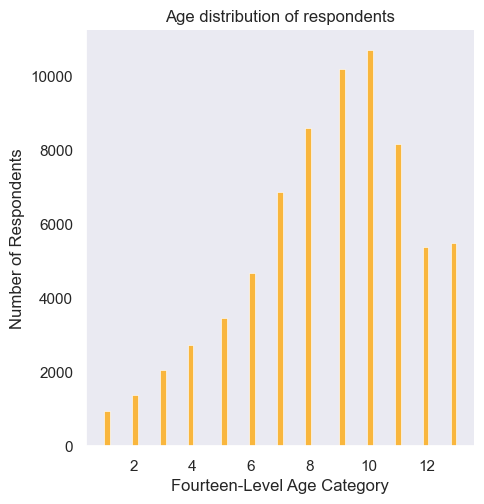

In [13]:
#plot age distribution
plt.figure(figsize=(4,3))
sns.displot(data_2015_balanced['Age'],  color="orange")  
sns.set(style='dark')
plt.title("Age distribution of respondents")
plt.xlabel('Fourteen-Level Age Category')
plt.ylabel('Number of Respondents')

Further exploration of the relationship between Age and Diabetes_Outcome.

Text(0, 0.5, 'Fourteen-Level Age Category')

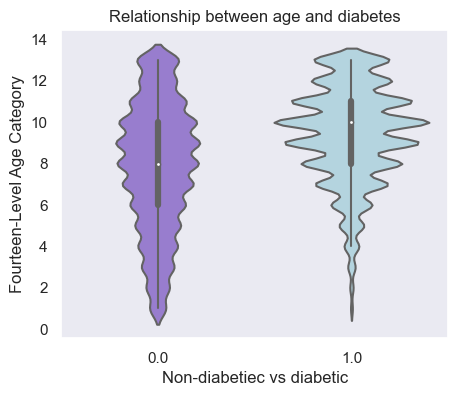

In [14]:
#plot relationship between age and diabetes
plt.figure(figsize=(5,4))
colors=["mediumpurple","lightblue"]
sns.violinplot(x='Diabetes_Outcome',y='Age',data=data_2015_balanced, palette=colors)
plt.title("Relationship between age and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Fourteen-Level Age Category')

We discovered that the majority of diabetics are between the ages of 65 and 69. (category 10).
Diabetes cases begin to rise sharply beyond the age of 45, implying that you are more likely to get diabetes as you age.

##### **Body Mass Index**
---

We now explore the relationship between Body Mass Index (BMI) and the class variable. The BMI (Body Mass Index) can be used to quickly and simply assess if someone is likely to be a healthy weight.Body Mass Index is calculated using a person’s height and weight. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9 [Juraschek *et al.* 2013].

Text(0.5, 0, 'Non-diabetiec vs diabetic')

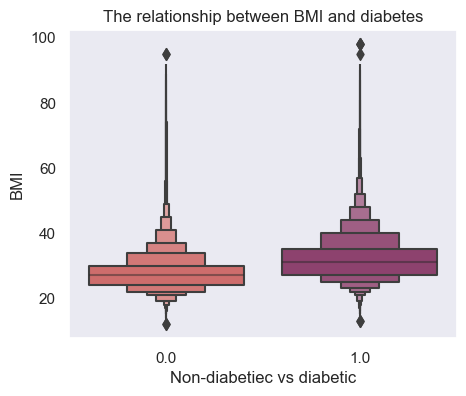

In [15]:
#plot BMI
plt.figure(figsize=(5,4))
sns.boxenplot(y='BMI',x='Diabetes_Outcome',data=data_2015_balanced, palette="flare")
plt.title("The relationship between BMI and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')

We discovered that most diabetics are overweight and that most non-diabetics are normally at a healthy weight based on their BMI score, implying that being overweight or sedentary increases your risk of developing diabetes.

#### ***Mental Health***
---

We now investigate how mental health contribute to diabetes ? Are people with mental health issues which includes stress, depression, and problems with emotions more likely to have diabetes ?

Text(0, 0.5, 'Number of days not mentally well')

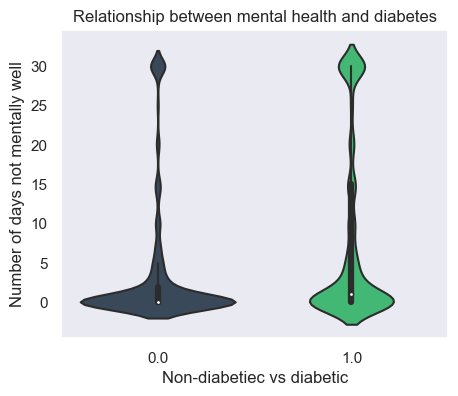

In [16]:
#plot relationship between physical health and the class variable
plt.figure(figsize=(5,4))
flatui = ["#34495e", "#2ecc71"]
sns.violinplot(x='Diabetes_Outcome',y='PhysHlth',data=data_2015_balanced, palette=flatui)
plt.title("Relationship between mental health and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Number of days not mentally well')

According to the plot above, more diabetics were not mentally well for a longer amount of time than non-diabetics, but the differences between the two groups (non-diabetics and diabetics) are negligible, suggesting that mental health is not a substantial risk factor for diabetes.

#### ***General Health***
---

To understand the bearing of general health on a person's diabetes status, we explore the
general health status (GENHLTH) feature measured on a scale of one to five: 
* 1 = Excellent
* 2 = Very good
* 3 = Good
* 4 = Fair
* 5 = Poor

Text(0, 0.5, 'Number of Respondents')

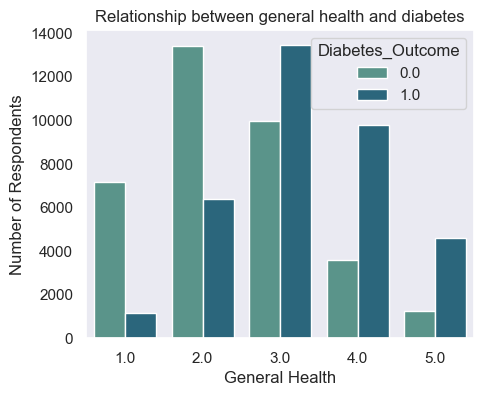

In [17]:
#plot general health relationship
plt.figure(figsize=(5,4))
sns.countplot(x='GenHlth',hue="Diabetes_Outcome",data=data_2015_balanced, palette="crest")
sns.set(style='dark')
plt.title("Relationship between general health and diabetes")
plt.xlabel("General Health")
plt.ylabel('Number of Respondents')

Notably, most people whose general health is excellent and very good are less diabetic, we also clearly see that
people whose health is good,fair and poor are diabetic. Positive lifestyle behaviours such as keeping a healthy body weight, eating nutritious foods, and exercising consistently might all contribute to this.

#### ***Physical Health***
---

What influence does physical health have on whether a person is diabetic or not ?, we take a closer look at this by exploring the physical health
status (PhysHlth) feature which is the number of days physical health not good.

Text(0, 0.5, 'Number of days not physically well')

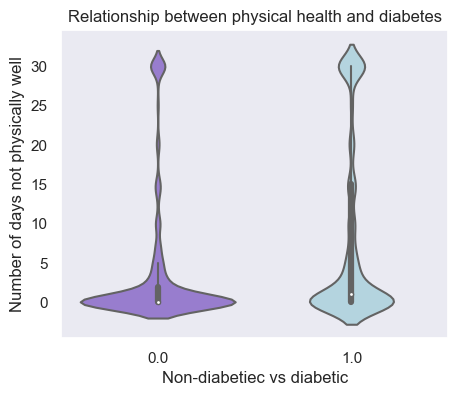

In [18]:
#plot relationship between physical health and the class variable
plt.figure(figsize=(5,4))
colors=["mediumpurple","lightblue"]
sns.violinplot(x='Diabetes_Outcome',y='PhysHlth',data=data_2015_balanced, palette=colors)
plt.title("Relationship between physical health and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Number of days not physically well')

Looking at the median from the violin plot, it's evident that most diabetics are individuals who were not physically well for an extended length of time. Again, a lack of good lifestyle behaviours such as keeping a healthy body weight, making healthy food choices, and exercising on a regular basis might be to blame.

#### ***High Blood Pressure***
---

We now investigate the influence of high blood pressure on diabetes. So while high blood pressure might not cause diabetes directly, it could increase the risk of someone developing diabetes if they have high blood pressure.

Text(0, 0.5, 'Has High Blood Pressure')

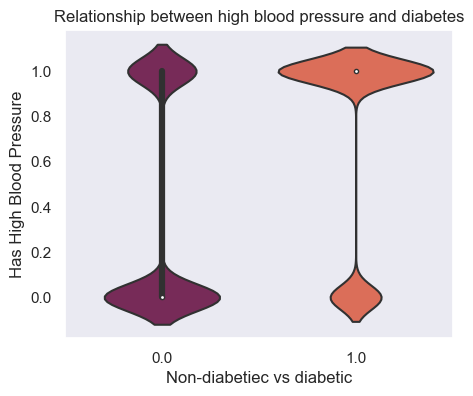

In [19]:
#plot relationship between high blood pressure and the class variable
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='HighBP',data=data_2015_balanced, palette="rocket")
plt.title("Relationship between high blood pressure and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Has High Blood Pressure')

We discovered that people with diabetes have higher blood pressure than non-diabetics; this could be due to the fact that patients with hypertension frequently exhibit insulin resistance, and hypertension and diabetes are closely linked due to similar risk factors such as endothelial dysfunction, vascular inflammation, arterial remodelling, atherosclerosis, dyslipidemia, and obesity [Petrie et al. 2018].


#### ***High Cholesterol***
---

Cholesterol is a structural component of cell membranes and is used to synthesise steroid hormones, vitamin D, and bile acids. Aside from providing structural stability and fluidity, cholesterol also plays an important role in regulating cell activity [Craig *et al.* 2022]. We want to determine if diabetes is associated with high cholesterol levels.

Text(0, 0.5, 'Has High Cholesterol ')

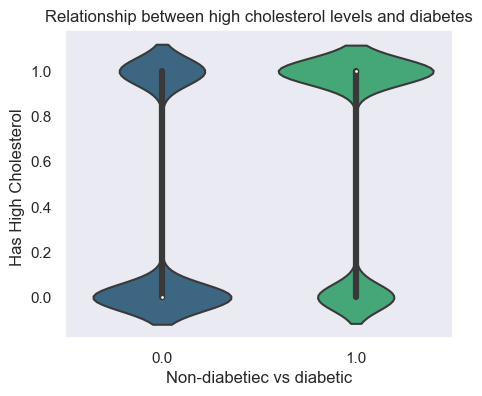

In [20]:
#plot relationship between high cholesterol levels and the class variable
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='HighChol',data=data_2015_balanced, palette="viridis")
plt.title("Relationship between high cholesterol levels and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Has High Cholesterol ')

As the plot shows, people with diabetes typically have higher levels of LDL/non-HDL cholesterol. This is known as 'dyslipidaemia,' and it indicates that your arteries are more prone to become narrowed or obstructed [Thompson 2004].

#### ***Difficulty walking***
---

How can your walking ability influence your risk of getting diabetes ?

Text(0, 0.5, 'Has Difficulty Walking')

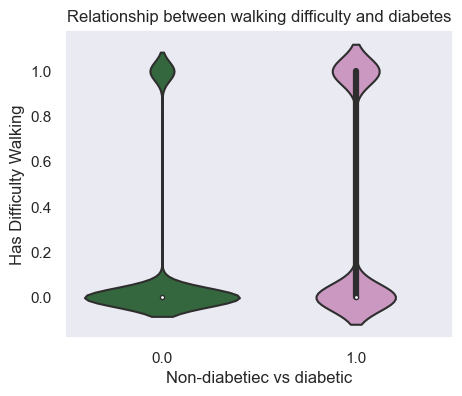

In [21]:
#plot relationship between walking difficulty and diabetes
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='DiffWalk',data=data_2015_balanced, palette="cubehelix")
plt.title("Relationship between walking difficulty and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Has Difficulty Walking')

So, our findings indicate that it is clear that the majority of diabetics have trouble walking. Diabetic peripheral neuropathy (DPN), a prevalent chronic consequence of diabetes mellitus, might be the cause of this. It causes unpleasant and costly clinical consequences such as foot ulceration, leg amputation, and neuropathic pain (painful-DPN). Unfortunately, DPN is frequently discovered late, when irreparable nerve damage has occurred, and its initial symptom may be a diabetic foot ulcer [Yang *et al.* 2020].


#### ***Heart Disease or Attack***
---

Heart disease includes several kinds of problems that affect your heart. In this case, the respondents were asked if they have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). We want to investigate if heart disease and 
diabetes go hand-in-hand.



Text(0, 0.5, 'Has Heart Disease')

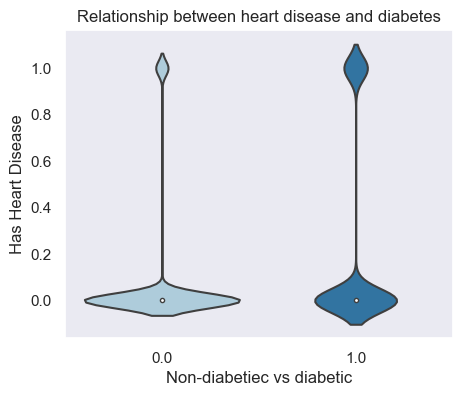

In [22]:
#plot relationship between heart disease and diabetes
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='HeartDiseaseorAttack',data=data_2015_balanced, palette="Paired")
plt.title("Relationship between heart disease and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Has Heart Disease')

The graph above indicates that heart disease and diabetes are linked. Obesity, hypertension, and dyslipidemia are significant risk factors for Haer disease in Diabetes patients, putting them at an elevated risk for cardiac events. Furthermore, several investigations have shown molecular processes linked to diabetes that independently raise the risk of heart disease in diabetic individuals [Leon and Maddox 2015].

#### ***Physical Activity***
---

Does physical activity prevent diabetes ? we investigate this by looking at the physical activity feature (PhysActivity) in our dataset, which represents adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

Text(0, 0.5, 'Is physically active')

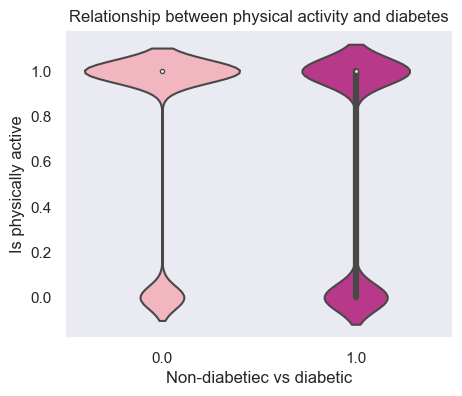

In [23]:
#plot relationship between physical activity and diabetes
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='PhysActivity',data=data_2015_balanced, palette="RdPu")
plt.title("Relationship between physical activity and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Is physically active')

We discovered that the majority of diabetics were not physically active, whereas the majority of non-diabetics were, and we know that physical exercise helps regulate blood sugar levels and decreases your risk of heart disease (which we've recently identified as a diabetes risk factor).


#### ***Education***
---

To understand the bearing of a person's education level and diabetes , we explore the
Education feature in our dataset. Education is assessed in the BRFSS by asking the respondent, "What is the highestgrade or year of school you completed?"

Responses were placed on a six-point ordinal scale: 
* (1) never attended school; 
* (2) grades 1–8; 
* (3) grades 9–11; 
* (4) grade 12 or GED; 
* (5) one to three years of college; and 
* (6) four years of college or more.

Text(0, 0.5, 'Number of Respondents')

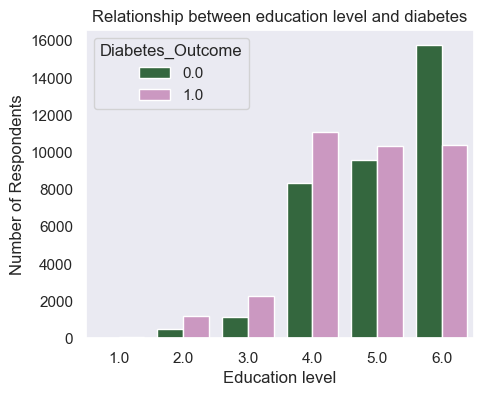

In [24]:
#plot education level and diabetes relationship
plt.figure(figsize=(5,4))
sns.countplot(x='Education',hue="Diabetes_Outcome",data=data_2015_balanced, palette="cubehelix")
sns.set(style='dark')
plt.title("Relationship between education level and diabetes")
plt.xlabel("Education level")
plt.ylabel('Number of Respondents')

We can observe from our plot that educational attainment is inversely related to diabetes prevalence. Individuals with four years of college or more are less likely to get diabetes, but those with less education are more likely. This shows that educational achievement may encourage the adoption of health habits such as proper eating and medication adherence.

#### ***Heavy Alcohol Consumption***
---

Is excess alcohol intake associated with an increased risk of type 2 diabetes ? We take a look at this by investigating the Heavy Alcohol  Consumption feature (HvyAlcoholConsump) which represents heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

Text(0, 0.5, 'Is a heavy alcohol user')

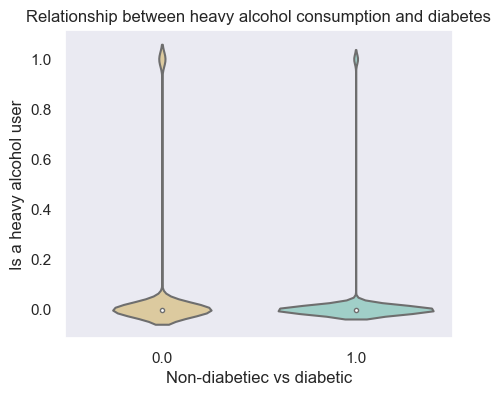

In [25]:
#plot relationship between heavy alcohol consumption and diabetes
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='HvyAlcoholConsump',data=data_2015_balanced, palette="BrBG")
plt.title("Relationship between heavy alcohol consumption and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Is a heavy alcohol user')

Our violin plot suggests that excessive alcohol consumption (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) may not have a link to diabetes, but we also notice that most
diabetics were not classified as heavy drinkers.

#### ***Smoker***
---

Smoking is assessed in the BRFSS by asking the respondent, "Have you smoked at least 100 cigarettes in your entire life?" [Note: 5 packs = 100 cigarettes], we explore and analyze this feature.

Text(0, 0.5, 'Is a smoker')

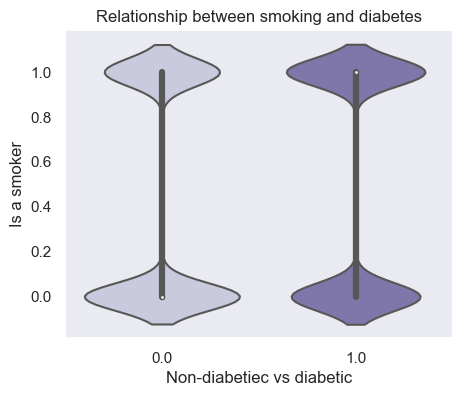

In [26]:
#plot relationship between smoking consumption and diabetes
plt.figure(figsize=(5,4))
sns.violinplot(x='Diabetes_Outcome',y='Smoker',data=data_2015_balanced, palette="Purples")
plt.title("Relationship between smoking and diabetes")
plt.xlabel('Non-diabetiec vs diabetic')
plt.ylabel('Is a smoker')

We noticed that the majority of non-diabetics were not smokers, but the majority of diabetics were. Although there is a slight difference in the number of diabetics who smoke against those who do not, we can nevertheless infer that persons who have smoked at least 100 cigarettes are more likely to get type 2 diabetes than people who do not smoke.

#### ***Income***
---

Lastly in our EDA, we investigate the link between diabetes and income. Income is assessed in the BRFSS by asking the respondent, "Is your annual household income from all sources ?"

 Responses were placed on a eight-point ordinal scale:
 
   - (1) Less than \$10,000
   - (2) Less than \$15 000 ( 10,000 dollars to less than 15,000 dollars)
   - (3) Less than \$20,000 ( 15,000 dollars to less than 20,000 dollars)
   - (4) Less than \$25,000 ( 20,000 dollars to less than 25,000 dollars)
   - (5) Less than \$35,000 ( 25,000 dollars to less than 35,000 dollars)
   - (6) Less than \$50,000 ( 35,000 dollars to less than 50,000 dollars)
   - (7) Less than \$75,000 ( 50,000 dollars to less than 75,000 dollars)
   - (8) \$75,000 or more 

Text(0, 0.5, 'Number of Respondents')

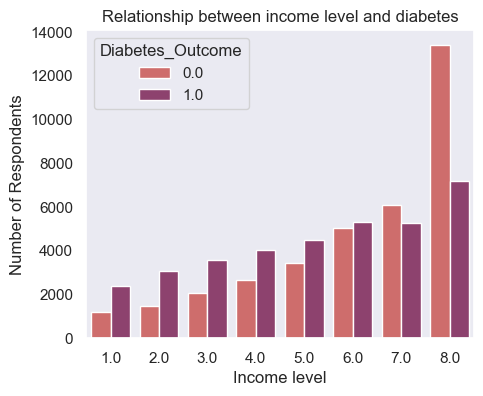

In [27]:
#plot income level and diabetes relationship
plt.figure(figsize=(5,4))
sns.countplot(x='Income',hue="Diabetes_Outcome",data=data_2015_balanced, palette="flare")
sns.set(style='dark')
plt.title("Relationship between income level and diabetes")
plt.xlabel("Income level")
plt.ylabel('Number of Respondents')

Diabetes appears to be more prevalent among people with poor income. We discovered that individuals earning less than $35,000 are more likely to be diabetic, but those earning at least 50,000 dollars are less likely to be diabetic. As a result, it's reasonable to state that the more marginalised a person is, the higher their chance of developing diabetes.

---
## <span style='color:blue' > Feature selection </span>
---

##  What is feature selection ?
---

Feature selection is the process of detecting and removing as many unneeded and superfluous features as possible. Prior to learning, feature selection can be useful since it reduces the size of the hypothesis space and allows algorithms to operate more quickly and effectively [Balakrishnan et al. 2008]. It has traditionally been used to tackle a broad range of problems, including medical applications, where it may not only reduce dimensionality but also aid in the explanation of disease origins [Remeseiro and Bolon-Canedo 2019]. We will concentrate on the Chi-square feature selection method in this project.

##  Chi-square ($\chi^2$) feature selection
---

Chi-square testing is a statistical approach for evaluating the connection between two
variables and determining whether they are independent or associated [Thabtah et al.
2009]. The Chi-squared is calculated using the below equation, where observed is the
actual number of class observations and expected is the number of class observations
that would be predicted if the feature and class had no connection. .

Here's the formula to calculate the Chi-square:
$$\chi^2 = \sum \frac{( Observed_i- Expected_i)^2}{Expected_i}$$

A strong Chi-squared value suggests that the feature and target class are not likely to
be independent, and hence the feature has to be retained the newly extracted dataset
[Spencer et al. 2020].

In [28]:
#we use SelectKBest class to extract the best features
feature_importance = SelectKBest(score_func=chi2,k='all')
#select all the features except the target feature
X1 = data_2015_balanced.iloc[:,1:-1]
y1 = data_2015_balanced.iloc[:,-1]
fit = feature_importance.fit(X1,y1)

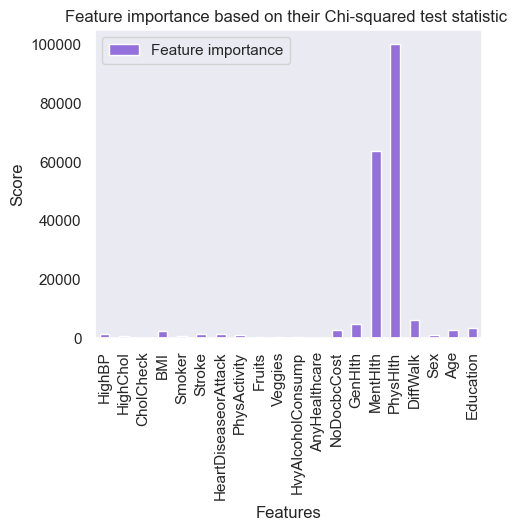

In [29]:
#we visualize the feature importance using the Chi-squared test statistic
plt.figure(figsize=(5,4))
visualizescore=pd.Series(fit.scores_, index=X1.columns)
visualizescore.plot(kind='bar',color='mediumpurple',label="Feature importance")
plt.title('Feature importance based on their Chi-squared test statistic ')
plt.ylabel('Score')
plt.xlabel('Features')
plt.legend()

The features were scored and visualized based on their Chi-squared test statistic as we can see above. The 8 most important features obtained using the Chi-squared were found to be:
 * PhysHlth 
 * MentHlth 
 * DiffWalk 
 * GenHlth
 * Education
 * NoDocbcCost
 * Age
 * BMI
 
This suggests that, at least statistically, these features are the most influential for predicting diabetes when employing Chi-square feature selection; these are the features that are now in our first subset and will be used to build the prediction models.
<br>We will refer to this as the **"Chi-square subset"**.

---
## <span style='color:blue' > Prediction Models with the Chi-square ($\chi^2$) subset </span>
---

After identifying the most important diabetes risk factors, we will use two different supervised machine learning algorithms namely  **Logistic Regression** and **Gaussian Naive Bayes Classifier** which are commonly used to solve problems associated with these types of medical applications. 



In [30]:
#This is the Chi-square subset of features 
X = data_2015_balanced[['PhysHlth','MentHlth','DiffWalk','GenHlth','Education','NoDocbcCost','Age','BMI']]
#The target feature
y = data_2015_balanced['Diabetes_Outcome']

#### ***Configure the Train-Test Split***
---

The basic goal of a machine learning model is to produce accurate predictions regarding cases that the model has never seen before. This is referred to as a generalisation error [Vabalas et al., 2019]. To calculate the generalisation error, we divide the dataset into two parts:
* Training : It will be used to train the model.
* Test : It will be used to measure the generalization error.
<br>Our split percentage is:
 * Train: 80%, 
 * Test: 20%

This is to make sure that our classification algorithm is able to generalize well to new data.

In [31]:
#Configure the Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

#### ***Data Standardization***
---

When dealing with several machine learning algorithms, data scaling is a suggested pre-processing step. The process of standardising a dataset entails rescaling the value distribution so that the mean of observed values is 0 and the standard deviation is 1 [Ambarwari *et al* 2020].

In [32]:
# define standard scaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression


Logistic Regression is frequently used to identify major risk variables for diabetes and
has been used to construct prediction models. Using the values of the predicted risk
variables, the logistic function determines the likelihood of diabetes [Daghistani and
Alshammari 2020].Logistic regression should be used to model binary dependent variables. The structure of the logistic regression model is designed for binary outcomes in the form: 
- $Y$ = Dependent variable (0 or 1, yes or no, A or B)
- $X$ = Independent variable
- $C$ = Constant term which will be the probability of the event happening when no other factors are considered

$$\log\left(\frac{Y}{1-Y}\right) = C + w_{i}+x_{i} + ... + w_{n}+x_{n}$$

In [33]:
## all parameters not specified are set to their defaults
logisticRegr=LogisticRegression()
#Training the model on the data, storing the information learned from the data
logisticRegr.fit(X_train,y_train)

LogisticRegression()

#### ***K-Fold Cross-Validation***
---

Each classification model will be fitted using **10-fold Cross-Validation** (i.e our K=10) to avoid model overfitting. Cross-validation is a statistical technique working by partitioning the dataset into ten folds with equal size. Nine folds used for model training and the tenth used for model testing. It is a data resampling method to assess the generalization ability of predictive models and to prevent overfitting [Berrar 2019].

In [34]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=logisticRegr, X=X_train ,y=y_train,cv=10)
#Make predictions on entire test data
pre=logisticRegr.predict(X_test)

#### ***Confusion matrix***
---


The confusion matrix allows us to calculate another series of measures to evaluate the performance of the classifier. To introduce these measures, we are going to decompose the confusion matrix into four parts.

<img src = "https://drive.google.com/uc?export=view&id=1NwaZST2l_A8ohWZCdYt15zXq3rP0dbrw">


The components of this matrix can be interpreted as:
* TP: True positives. Correct result for the positive class.
* TN: True negatives. Correct absence for the positive class.
* FP: False positives. Unexpected results.
* FN: False negatives. Missing results.

It is worth clarifying that in binary classification, the terms *positive* or *negative* refer to the prediction of the classifier (Class), while *true* or *false* refer to whether the prediction was correct or not.

From this matrix we can rewrite the definitions of accuracy and error:
* $Accuracy = \frac {TP + TN} {TP + FN + FP + TN}$

As well as the definitions of precision, recall and f1 score:

* $Precison = \frac {TP} {TP + FP}$
* $Recall = \frac {TP} {FN + TP}$
* $F_1 = 2 * \frac {PRE * REC} {PRE + REC}$

Accuracy can be defined as the ability of the classifier to **not** classify a sample as positive when it is negative. While the recall (recovery index) can be defined as the ability of the classifier to find all positive samples. $ F_1 \textit {score} $ is defined as the weighted average of precision and recall [Spencer et al. 2020].

Text(0.5, 427.9555555555555, 'Prediction Label')

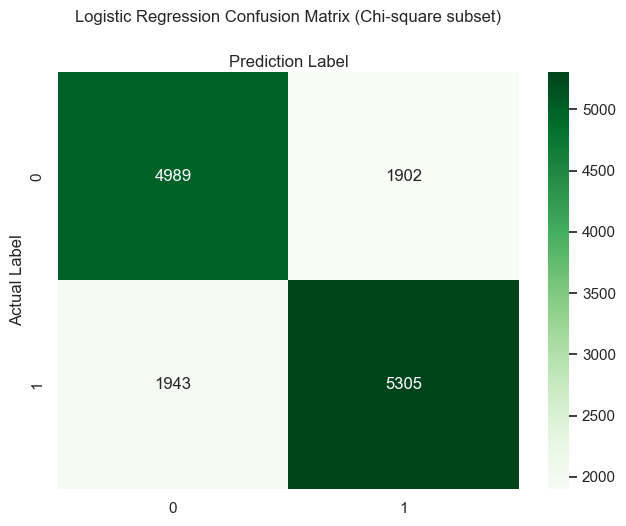

In [35]:
#visualize the confusion matrix
cnf_matrix = metrics.confusion_matrix(pre,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Greens', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix (Chi-square subset)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [36]:
#print the classification report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      6891
         1.0       0.74      0.73      0.73      7248

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



Therefore our Logistic Regression model with the Chi-square subset achieved the following results:
   - Accuracy: 73%
   - Precision: 74%
   - Recall: 73%


## Gaussian Naive Bayes Classifier
---


#### ***Bayesian classification***
---

Naive Bayes classifiers are based on Bayesian classification methods. That is, they are based on Bayes' theorem, which describes the relationship of the conditional probabilities of statistical quantities. In this case, we want to estimate the probability that an example with characteristics $ x = (x_1, x_2, \dots, x_n) $ belongs to a given class **C**: $P (C | x_1, x_2, \dots , x_n)$.

Through Bayes' theorem it can be expressed in terms of quantities that we can calculate more directly:

$$P (C | x_1, x_2, \dots, x_n) = \frac {P (x_1, x_2, \dots, x_n | C) P (C)} {P (x_1, x_2, \dots, x_n)}$$

* If we are trying to decide between two classes, called $C_1$ and $C_2$, we choose the class with the highest probability. For example, yes

$$P (C_1 | x_1, x_2, \dots, x_n) \ge P (C_2 | x_1, x_2, \dots, x_n)$$

the most reasonable prediction is $C_1$.

The Naive Bayes classifier (or naive Bayesian classifier) ​​makes a strong assumption: that the characteristics are conditionally independent given the class. That is to say:
$$P (x_1, x_2, \dots, x_n | C) = P (x_1 | C) P (x_2 | C) \dots P (x_n | C)$$
<br>The Naive Bayes classfier is commonly used for these machine learning problems [Leung 2007].

In [37]:
#all parameters not specified are set to their defaults
classifier2=GaussianNB()
#Training the model on the data, storing the information learned from the data
classifier2.fit(X_train,y_train)

GaussianNB()

In [38]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=classifier2, X=X_train ,y=y_train,cv=10)

Text(0.5, 427.9555555555555, 'Prediction Label')

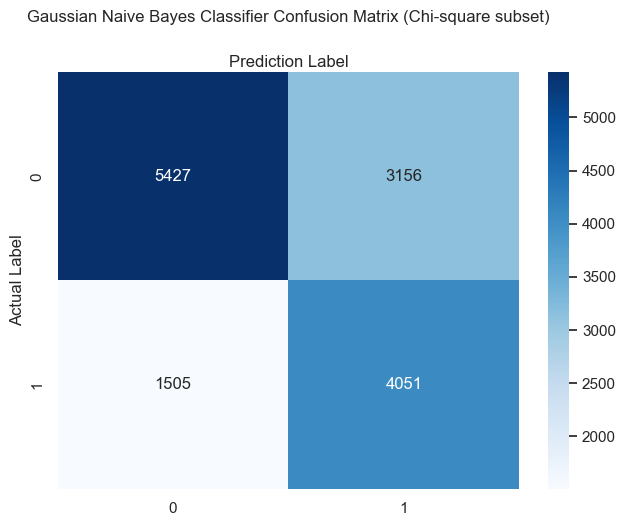

In [39]:
#visualize the confusion matrix
pre2=classifier2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(pre2,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Gaussian Naive Bayes Classifier Confusion Matrix (Chi-square subset)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [40]:
#print the classfication report
print(classification_report(pre2,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70      8583
         1.0       0.56      0.73      0.63      5556

    accuracy                           0.67     14139
   macro avg       0.67      0.68      0.67     14139
weighted avg       0.70      0.67      0.67     14139



Therefore our Gaussian Naive Bayes Classifier model with the Chi-square subset achieved the following results:
   - Accuracy: 67%
   - Precision: 56%
   - Recall: 73%


## Pearson Correlation feature selection

CA variable's correlation indicates how that variable is connected to the target (Diabetes 01). If the correlation between a variable and the target is "1," it implies they are highly correlated and are bound by direct proportionality, which means that when the variable value increases, so does the target value.

If the correlation between the variable and the target is "-1," it implies they are inversely correlated, which means they are bound by an inverse relationship, which means that as the value of the variable increases, so does the value of the target.

The feature
selection with Pearson correlation is obtained from ranking
four features that have a strong correlation (R-Value = 1)
between the baseline that is the state without stimulation and
on the test which is an assessment of stimulated workload.
These features that have high-rank correlation are mean, mean
absolute, and standard deviation [Risqiwati 2020]. 

Here's the formula to calculate the correlation. 
$$R = \frac{\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)} {\sqrt{\sum_{i=1}^{n}(x_i - \bar x)^2 \sum_{i=1}^{n}(y_i-\bar y)^2}}$$


##### **Correlation**
---

We will apply Pearson correlation coefficient-based technique to select the optimized features while removing the redundant features.

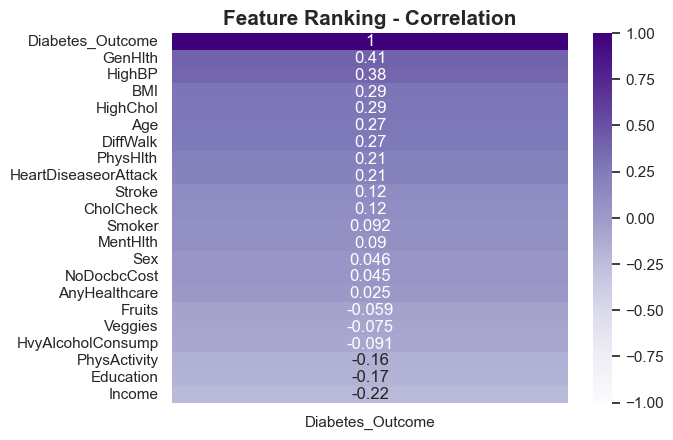

In [41]:
#Plot the correlation

sns.set_theme(style="whitegrid")
heatmap = sns.heatmap(data_2015_balanced.corr()[['Diabetes_Outcome']].sort_values(by='Diabetes_Outcome', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Feature Ranking - Correlation',fontsize=15, fontweight='bold');


From the above figure it's clear to see that Stroke, CholCheck, MentHlth, Smoker, NoDocbcCost, Sex, AnyhealthCare, Fruits, Veggies and HvyAlcoholConsump have an insignificant correlation with Diabetes_Outcome. And we can also see clear that GenHlth, HighBP, BMI, HighChol, Age, DiffWalk, PhysHlth, HeartDiseaseorAttack, Education, PhyscActivity and Income have a significant correlation with Diabetes_Outcome. 

However we are only interested in top 8 important (significantly correlated) features for our new subset which we have found to be:

 - GenHlth 
 - HighBP 
 - BMI 
 - HighChol 
 - Age 
 - DiffWalk 
 - PhysHlth  
 - HeartDiseaseorAttack
 
<br>This means these features, at least in a statistical sense, are the most influential for predicting diabetes when using Pearson Correlation feature selection, we will refer to them as the **Pearson's Correlation subset**. 

---
## <span style='color:blue' > Prediction Models with the Pearson's Correlation subset </span>
---

In [42]:
#This is the Pearson subset of features 
X = data_2015_balanced[['GenHlth','HighBP','BMI','HighChol','Age','DiffWalk','PhysHlth','HeartDiseaseorAttack']]
#The target feature
y = data_2015_balanced['Diabetes_Outcome']

#### ***Configure the Train-Test Split***
---

Our split percentage is still maintained as:
 * Train: 80%, 
 * Test: 20%

This is to make sure that our classification algorithm is able to generalize well to new data.

In [43]:
#Configure the Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Logistic Regression
---

#### ***Data Standardization***
---

In [44]:
# define standard scaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# all parameters not specified are set to their defaults
logisticRegr=LogisticRegression()
#Training the model on the data, storing the information learned from the data
logisticRegr.fit(X_train,y_train)

LogisticRegression()

#### ***K-Fold Cross-Validation***
---

In [46]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=logisticRegr, X=X_train ,y=y_train,cv=10)
#Make predictions on entire test data
pre3=logisticRegr.predict(X_test)

Text(0.5, 427.9555555555555, 'Prediction Label')

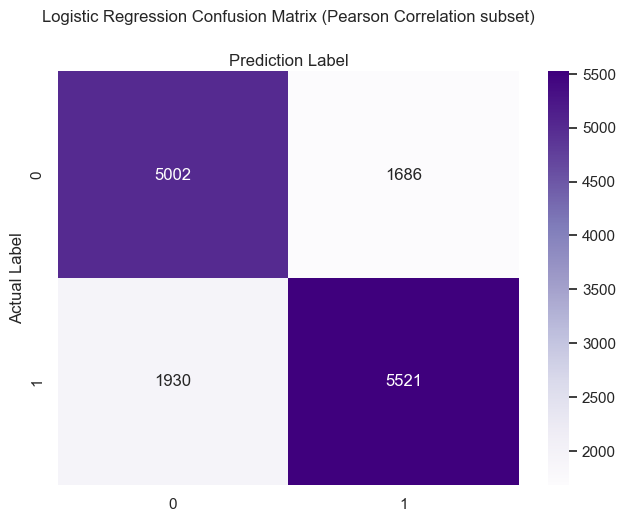

In [47]:
#visualize the confusion matrix
cnf_matrix = metrics.confusion_matrix(pre3,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Purples', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix (Pearson Correlation subset)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [48]:
#print the classification report
print(classification_report(pre3,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73      6688
         1.0       0.77      0.74      0.75      7451

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



Therefore our Logistic Regression model with the Pearson Correlation subset achieved the following results:
   - Accuracy: 74%
   - Precision: 77%
   - Recall: 74%

## Gaussian Naive Bayes Classifier
---

In [49]:
#all parameters not specified are set to their defaults
classifier2=GaussianNB()
#Training the model on the data, storing the information learned from the data
classifier2.fit(X_train,y_train)

GaussianNB()

In [50]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=classifier2, X=X_train ,y=y_train,cv=10)

Text(0.5, 427.9555555555555, 'Prediction Label')

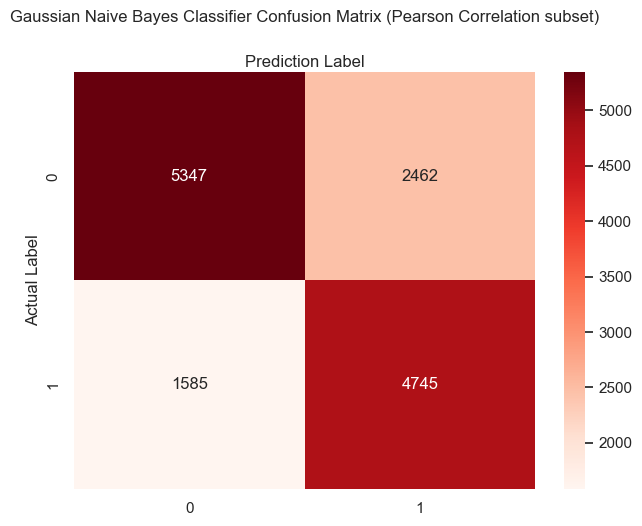

In [51]:
#visualize the confusion matrix
pre4=classifier2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(pre4,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Gaussian Naive Bayes Classifier Confusion Matrix (Pearson Correlation subset)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [52]:
#print the classfication report
print(classification_report(pre4,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.73      7809
         1.0       0.66      0.75      0.70      6330

    accuracy                           0.71     14139
   macro avg       0.71      0.72      0.71     14139
weighted avg       0.72      0.71      0.71     14139



Therefore our Gaussian Naive Bayes Classifier model with the Pearson Correlation subset achieved the following results:
   - Accuracy: 71%
   - Precision: 66%
   - Recall: 75%

---
## <span style='color:blue' > Prediction Models with full set of features (No Feature Selection) </span>
---

The performance of classifiers is evaluated with full features in order to compare it to the selected feature set models.

In [53]:
#These are the full features
X = data_2015_balanced[['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
            'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education']]
#The target feature
y = data_2015_balanced['Diabetes_Outcome']

#### ***Configure the Train-Test Split***
---

Our split percentage is still maintained as:
 * Train: 80%, 
 * Test: 20%

This is to make sure that our classification algorithm is able to generalize well to new data.

In [54]:
#Configure the Train-Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

## Logistic Regression
---

#### ***Data Standardization***
---

In [55]:
# define standard scaler
scaler = StandardScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# all parameters not specified are set to their defaults
logisticRegr=LogisticRegression()
#Training the model on the data, storing the information learned from the data
logisticRegr.fit(X_train,y_train)

LogisticRegression()

#### ***K-Fold Cross-Validation***
---

In [57]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=logisticRegr, X=X_train ,y=y_train,cv=10)
#Make predictions on entire test data
pre5=logisticRegr.predict(X_test)

Text(0.5, 427.9555555555555, 'Prediction Label')

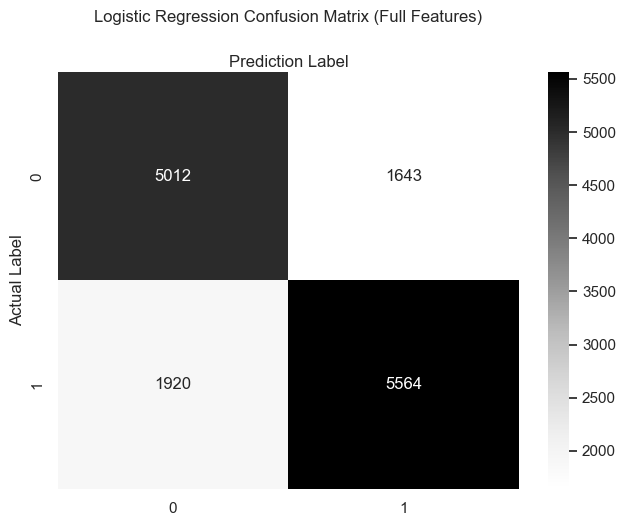

In [58]:
#visualize the confusion matrix
cnf_matrix = metrics.confusion_matrix(pre5,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Greys', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Logistic Regression Confusion Matrix (Full Features)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [59]:
#print the classification report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74      6655
         1.0       0.77      0.74      0.76      7484

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Therefore our Logistic Regression model with the full set of features achieved the following results:
   - Accuracy: 75%
   - Precision: 77%
   - Recall: 75%


## Gaussian Naive Bayes Classifier
---

In [60]:
#all parameters not specified are set to their defaults
classifier2=GaussianNB()
#Training the model on the data, storing the information learned from the data
classifier2.fit(X_train,y_train)

GaussianNB()

In [61]:
#configure 10 fold-cross-validation
accuracies = cross_val_score(estimator=classifier2, X=X_train ,y=y_train,cv=10)

Text(0.5, 427.9555555555555, 'Prediction Label')

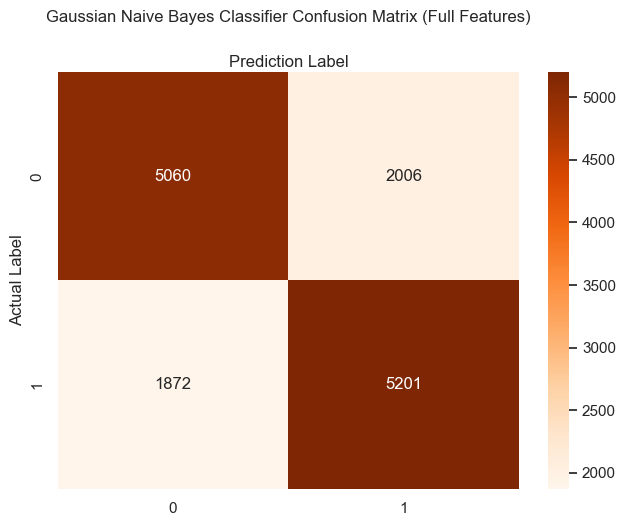

In [62]:
#visualize the confusion matrix
pre6=classifier2.predict(X_test)
cnf_matrix = metrics.confusion_matrix(pre6,y_test)
class_names = [0,1]
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_names))
plt.xticks(ticks_marks, class_names)
plt.yticks(ticks_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Oranges', fmt='g') # fmt='g' is for the annot shows in normal numbers 
ax.xaxis.set_label_position('top')
ax.autoscale(enable=True) # To fix scale 
plt.tight_layout()
plt.title('Gaussian Naive Bayes Classifier Confusion Matrix (Full Features)', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Prediction Label')

In [63]:
#print the classfication report
print(classification_report(pre6,y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      7066
         1.0       0.72      0.74      0.73      7073

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



Therefore our Gaussian Naive Bayes Classifier model with the full set of features achieved the following results:
   - Accuracy: 73%
   - Precision: 72%
   - Recall: 74%

## Results and Interpretation
---

When we used feature selection and extraction to our diabetes dataset, the results varied greatly depending on whatever classification technique we used to build a model. Although the two techniques choose different features, **GenHlth**, **Age**, **BMI**, **DiffWalk**, and **PhysHlth** are rated in both subsets. The models created on the original dataset outperformed all of the models developed on selected feature subsets, but the differences were small in some cases. The model constructed by the Logistic Regression technique utilising the original dataset with all features had the greatest precision of any model we created, with an accuracy of 75%, precision of 77%, and recall of 75%.

Models constructed using Machine Learning techniques on the Pearson Correlation subset produced
accuracies that were typically greater than those generated from the Chi-squared subset but lower
than those built using the same ML algorithms on the original complete feature dataset. Although
the difference in results was marginal, the most accurate model of the two subset models was
developed using Logistic Regression and attained an accuracy of 74%, precision of 77%, and recall
of 75%.

The marginal differences of models across ML methods means that clinicians may choose to use a
model that is easy to implement without a major loss in accuracy.

---
## <span style='color:blue' > Hypothesis Testing</span>
---

A t-test is a statistical test is used to compare the means of two groups. We do a permutation test on the two samples to obtain a t-value and a p-value of the permutation test.

**Null Hypothesis**: There is no significant mean difference in Body Mass Index between 2 independent samples (grouped by whether patient is Diabetic or not)
<br>**Alternative Hypothesis**: There is a significant mean difference in Body Mass Index between 2 independent samples (grouped by whether patient is Diabetic or not)

<br>$H_0$ : $\bar x_1$ = $\bar x_2 $<br>
$H_1$ : $\bar x_1$ $\neq$ $\bar x_2$

<br> The hypothesis test is done at a 5% significance level.

In [64]:
#split the data
do_have_diabetes=data_2015_balanced['BMI'][data_2015_balanced['Diabetes_Outcome']==1].sample(n=30)
do_not_have_diabetes=data_2015_balanced['BMI'][data_2015_balanced['Diabetes_Outcome']==0].sample(n=30)

In [65]:
t_stat, p_val=scipy.stats.ttest_ind(do_have_diabetes,do_not_have_diabetes,equal_var=False)

In [66]:
print("t value = ", round(t_stat,5))
print("p value = ", round(p_val,5))

t value =  2.59069
p value =  0.01242


Considering significance level alpha as 0.05, we reject the null hypothesis ($H_0$) because the p-value is less than 0.05.

## Project Limitations
---

Our project is limited in that we have only looked at a selection of Machine Learning classifiers and feature selection methods. In a future project, it would be interesting to look at different combinations of feature selection methods with Machine Learning algorithms including wrapper and embedded feature selection methods and to use an even larger dataset.

## Conclusion
---

In this project, we reviewed recent approaches to feature selection in medical applications, demonstrating that feature selection is a useful pre-processing tool that not only reduces the number of input features, saving on future data collection, but also assists practitioners in understanding the underlying causes of certain diseases. This project looked at two feature selection methods, Chi-squared and Pearson Correlation, as well as two machine learning classifiers, Logistic Regression and Gaussian Naive Bayes, which are widely used to tackle issues in these sorts of medical applications.

Our results show that the Logistic Regression provides the best performance across the two feature
sets generated from each feature selection method, with an accuracy of 74%, precision of 77%, and
recall of 75%. The most accurate model we found achieved an accuracy of 75%, precision of 77% and
a recall of 75% when using the original full feature dataset with the Logistic Regression algorithm
again.

The presented models can be useful for doctors and medical professionals to focus on most significant features of the dataset. It can assist clinicians in effective decision making for the diagnosis of diabetes.

## References
---

[Sisodia and Sisodia 2018] Deepti Sisodia and Dilip Singh Sisodia. Prediction of diabetes
using classification algorithms. Procedia computer science, 132:1578–1585,
2018.

[Brown *et al.* 2004] Brown, D.W., Balluz, L.S., Giles, W.H., Beckles, G.L., Moriarty, D.G., Ford, E.S. and Mokdad, A.H., 2004. Diabetes mellitus and health-related quality of life among older adults: Findings from the behavioral risk factor surveillance system (BRFSS). Diabetes research and clinical practice, 65(2), pp.105-115.

[Ford and Newman 1991] Ford, E.S. and Newman, J., 1991. Smoking and diabetes mellitus: findings from 1988 behavioral risk factor surveillance system. Diabetes Care, 14(10), pp.871-874.

[Chandler 2018] Chandler, M.A., 2018. Predictors of Health Care Utilization among Older Returning African American Men (Doctoral dissertation, Morgan State University).

[Spencer *et al.* 2020] Robinson Spencer, Fadi Thabtah, Neda Abdelhamid, and Michael
Thompson. Exploring feature selection and classification methods

[Ullah *et al.* 2022] Ullah, Z., Saleem, F., Jamjoom, M., Fakieh, B., Kateb, F., Ali, A.M. and Shah, B., 2022. Detecting High-Risk Factors and Early Diagnosis of Diabetes Using Machine Learning Methods. Computational Intelligence and Neuroscience, 2022.

[Qazi and Raza 2012] Qazi, N. and Raza, K., 2012, March. Effect of feature selection, SMOTE and under sampling on class imbalance classification. In 2012 UKSim 14th International Conference on Computer Modelling and Simulation (pp. 145-150). IEEE.

[Nordström *et al.* 2016] Nordström*, A., Hadrévi, J., Olsson, T., Franks, P.W. and Nordström, P., 2016. Higher prevalence of type 2 diabetes in men than in women is associated with differences in visceral fat mass. The Journal of Clinical Endocrinology & Metabolism, 101(10), pp.3740-3746.

[Juraschek*et al.* 2013] Juraschek, S.P., Miller III, E.R. and Gelber, A.C., 2013. Body mass index, obesity, and prevalent gout in the United States in 1988–1994 and 2007–2010. Arthritis care & research, 65(1), pp.127-132.

[Petrie *et al.* 2018] Petrie JR, Guzik TJ, Touyz RM. Diabetes, Hypertension, and Cardiovascular Disease: Clinical Insights and Vascular Mechanisms. Can J Cardiol. 2018 May;34(5):575-584. doi: 10.1016/j.cjca.2017.12.005. Epub 2017 Dec 11. PMID: 29459239; PMCID: PMC5953551.

[Craig *et al.* 2022] Craig M, Yarrarapu SNS, Dimri M. Biochemistry, Cholesterol. [Updated 2022 Aug 15]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2022 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK513326/

[Thompson 2004] Thompson GR. Management of dyslipidaemia. Heart. 2004 Aug;90(8):949-55. doi: 10.1136/hrt.2003.021287. PMID: 15253984; PMCID: PMC1768388.

[Yang 2020] Yang, H., Sloan, G., Ye, Y., Wang, S., Duan, B., Tesfaye, S. and Gao, L., 2020. New perspective in diabetic neuropathy: from the periphery to the brain, a call for early detection, and precision medicine. Frontiers in endocrinology, 10, p.929.

Leon BM, Maddox TM. Diabetes and cardiovascular disease: Epidemiology, biological mechanisms, treatment recommendations and future research. World J Diabetes. 2015 Oct 10;6(13):1246-58. doi: 10.4239/wjd.v6.i13.1246. PMID: 26468341; PMCID: PMC4600176.

[Balakrishnan et al. 2008] Sarojini Balakrishnan, Ramaraj Narayanaswamy, Nickolas
Savarimuthu, and Rita Samikannu. Svm ranking with backward search for feature
selection in type ii diabetes databases. In 2008 IEEE International Conference on
Systems, Man and Cybernetics, pages 2628–2633. IEEE, 2008.

[Remeseiro and Bolon-Canedo 2019] Beatriz Remeseiro and Veronica Bolon-Canedo.
A review of feature selection methods in medical applications. Computers in biology
and medicine, 112:103375, 2019.

[Thabtah et al. 2009] Fadi Thabtah, M Eljinini, Mannam Zamzeer, and W Hadi. Na¨ıve
bayesian based on chi square to categorize arabic data. In Proceedings of the 11th
international business information management association conference (IBIMA) conference
on innovation and knowledge management in twin track economies, Cairo,
Egypt, pages 4–6, 2009.

[Vabalas 2019] Vabalas, A., Gowen, E., Poliakoff, E. and Casson, A.J., 2019. Machine learning algorithm validation with a limited sample size. PloS one, 14(11), p.e0224365

[Ambarwari et al 2020] Ambarwari, A., Adrian, Q.J. and Herdiyeni, Y., 2020. Analysis of the effect of data scaling on the performance of the machine learning algorithm for plant identification. Jurnal RESTI (Rekayasa Sistem Dan Teknologi Informasi), 4(1), pp.117-122.

[Daghistani and Alshammari 2020] Tahani Daghistani and Riyad Alshammari. Comparison
of statistical logistic regression and random forest machine learning techniques
in predicting diabetes. Journal of Advances in Information Technology Vol,
11(2):78–83, 2020.

[Berrar 2019] Berrar, D., 2019. Cross-Validation.

[Leung 2007] Leung, K.M., 2007. Naive bayesian classifier. Polytechnic University Department of Computer Science/Finance and Risk Engineering, 2007, pp.123-156.

[Risqiwati 2020] Risqiwati, D., Wibawa, A.D., Pane, E.S., Islamiyah, W.R., Tyas, A.E. and Purnomo, M.H., 2020, July. Feature selection for EEG-based fatigue analysis using Pearson correlation. In 2020 International Seminar on Intelligent Technology and Its Applications (ISITIA) (pp. 164-169). IEEE.